In [21]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np

from lazypredict.Supervised import LazyRegressor 
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

from  sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score , mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [22]:
with open("databangladeshi_users.json") as f :
    jsn = json.load(f)


In [23]:
flat_data = []

for user_data in jsn :
    flat_data.append({
        "purchases" : sum(user_data["purchases"]),
        "items" : len(user_data["purchases"]),
        "average" : sum(user_data["purchases"])/len(user_data["purchases"]),
        "location" : user_data["location"],
        "lastlogin" : user_data["last_login"],
        "loyalty" : user_data["loyalty"]
    })

df = pd.DataFrame(flat_data)
df.head()

,purchases,items,average,location,lastlogin,loyalty
0,4931,4,1232.75,Barisal,2025-04-25,Bronze
1,1137,2,568.50,Chittagong,2025-04-30,Bronze
2,2483,2,1241.50,Rajshahi,2025-05-06,Bronze
3,1986,3,662.00,Mymensingh,2025-03-24,Bronze
4,4862,5,972.40,Khulna,2025-05-20,Bronze


Cleaning and encoding

In [24]:
df["lastlogin"] = pd.to_datetime(df["lastlogin"])

df["lastseen"] = (datetime.today() - df["lastlogin"]).dt.days


df = df.drop(columns= "lastlogin")

df.head()

,purchases,items,average,location,loyalty,lastseen
0,4931,4,1232.75,Barisal,Bronze,30
1,1137,2,568.50,Chittagong,Bronze,25
2,2483,2,1241.50,Rajshahi,Bronze,19
3,1986,3,662.00,Mymensingh,Bronze,62
4,4862,5,972.40,Khulna,Bronze,5


In [25]:
le_loc = LabelEncoder()
le_loyl = LabelEncoder()

df["location"] = le_loc.fit_transform(df["location"])

df["loyalty"] = le_loyl.fit_transform(df["loyalty"])

df.head()

,purchases,items,average,location,loyalty,lastseen
0,4931,4,1232.75,0,0,30
1,1137,2,568.50,1,0,25
2,2483,2,1241.50,5,0,19
3,1986,3,662.00,4,0,62
4,4862,5,972.40,3,0,5


outlayer

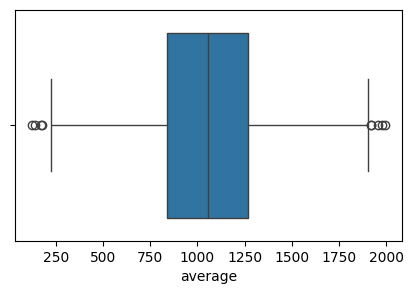

In [26]:
plt.figure(figsize=(5,3))
sns.boxplot(x="average",data = df)
plt.show()

In [27]:
q1 = df["average"].quantile(.25)
q3 = df["average"].quantile(.75)

iqr = q3-q1

min_range = q1 - 1.5 * iqr
max_range = q1 + 1.5 * iqr

df = df[(df["average"]>= min_range) & (df["average"]<=max_range)]


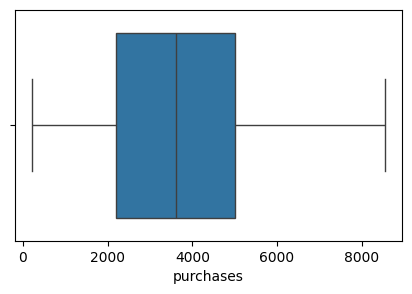

In [28]:
plt.figure(figsize=(5,3))
sns.boxplot(x="purchases",data = df)
plt.show()

splitting

In [29]:
x = df.drop(["purchases"], axis=1)  
y = df["purchases"]               

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


lazypredict regression

In [30]:

reg = LazyRegressor( ignore_warnings=True, random_state=42)

models, predictions = reg.fit(x_train, x_test, y_train, y_test)
models

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 5
[LightGBM] [Info] Start training from score 3626.483333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,1.00,1.00,41.54,0.18
GradientBoostingRegressor,1.00,1.00,95.43,0.10
XGBRegressor,1.00,1.00,98.12,0.12
DecisionTreeRegressor,1.00,1.00,100.18,0.01
RandomForestRegressor,1.00,1.00,115.15,0.22
BaggingRegressor,0.99,0.99,149.91,0.04
LGBMRegressor,0.99,0.99,177.30,0.05
HistGradientBoostingRegressor,0.99,0.99,179.07,0.13
ExtraTreeRegressor,0.99,0.99,215.91,0.01


tuning

In [31]:
enet = ElasticNet(max_iter=10000)
param = {
    "alpha": [0.001, 0.01, 0.1, 0.5, 1, 10],
    "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9],
    "random_state": list(range(1, 50)),
    "selection": ['cyclic', 'random']
}

In [32]:
grd_srch = GridSearchCV(enet,param,cv=5,scoring="r2")
grd_srch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 10],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'selection': ['cyclic', 'random']},
             scoring='r2')

In [33]:
print("Best Parameters:", grd_srch.best_params_)
print("Best R² Score on CV:", grd_srch.best_score_)


Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.9, 'random_state': 41, 'selection': 'random'}
Best R² Score on CV: 0.9404366922945251


Model

In [46]:

enet = ElasticNet(alpha= 0.1, l1_ratio= 0.9,  random_state=41, selection= 'random')
enet.fit(x_train,y_train)

y_train_pred = enet.predict(x_train )
y_test_pred = enet.predict(x_test)

In [56]:
pred = pd.DataFrame({"actual" : y_test , "predictions" : y_test_pred})
pred.tail()

,actual,predictions
419,1446,2392.09
411,5129,5562.21
348,4305,4302.14
67,5262,5176.77
183,4284,4231.47


plotting

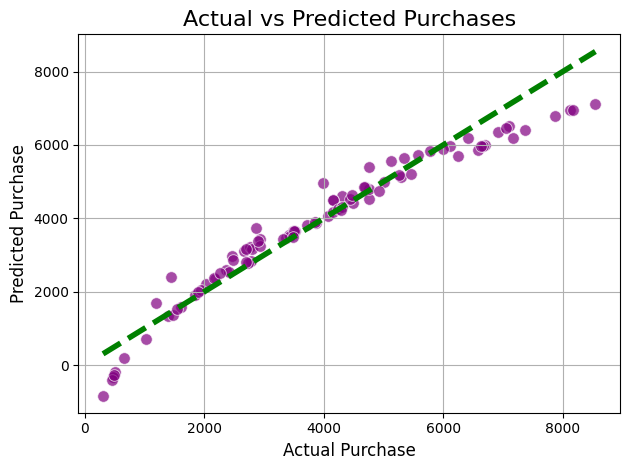

In [73]:
sns.scatterplot(x= y_test , y =y_test_pred ,c="purple",s=70,alpha =.7)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c="g",linestyle = "--",linewidth = 4)

plt.title("Actual vs Predicted Purchases", fontsize=16)
plt.xlabel("Actual Purchase", fontsize=12)
plt.ylabel("Predicted Purchase", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.show()


Evaluate

In [ ]:
MSE = mean_squared_error(y_test,y_test_pred)
RMSE = np.sqrt(MSE)


print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("MSE : ",MSE )
print("RMSE:", RMSE)



Train R²: 0.9444126215114872
Test R²: 0.9404435815841643
MSE :  240162.25622151548
RMSE: 490.06352263917324
Cross-validated R² scores: [0.9305295  0.94308401 0.9275746  0.94478395 0.93874888]
Average R² score: 0.9369441896998559
Standard Deviation of R²: 0.006802258198071535
CV RMSE Scores: [452.75167392 484.55886018 520.03172739 436.97145333 439.40588726]
Mean CV RMSE: 466.74392041756937


validation

In [36]:


r2_scores = cross_val_score(enet, x, y, cv=5, scoring='r2')

print("Cross-validated R² scores:", r2_scores)
print("Average R² score:", np.mean(r2_scores))
print("Standard Deviation of R²:", np.std(r2_scores))


neg_mse_scores = cross_val_score(enet, x, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-neg_mse_scores)
print("CV RMSE Scores:", rmse_scores)
print("Mean CV RMSE:", np.mean(rmse_scores))

Cross-validated R² scores: [0.93022648 0.94211385 0.92842558 0.94465318 0.93940265]
Average R² score: 0.9369643477718295
Standard Deviation of R²: 0.00647904866144257
CV RMSE Scores: [453.73801921 488.67117189 516.96759768 437.48858423 437.05460334]
Mean CV RMSE: 466.7839952712937
